In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
from math import sqrt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from pydataset import data

## Load the tips dataset from either pydataset or seaborn.

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [3]:
df['y_bl'] = df.tip.mean()

model = ols('df.tip ~ df.total_bill', data=df).fit()
df['y_hat'] = model.predict(df.total_bill)
df.head()

,total_bill,tip,sex,smoker,day,time,size,y_bl,y_hat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


## Plot the residuals for the linear regression model that you made.

In [4]:
df['residuals'] = df.y_hat - df.tip
df['resid_bl'] = df.y_bl - df.tip
df.head()

,total_bill,tip,sex,smoker,day,time,size,y_bl,y_hat,residuals,resid_bl
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,-0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,-0.611721


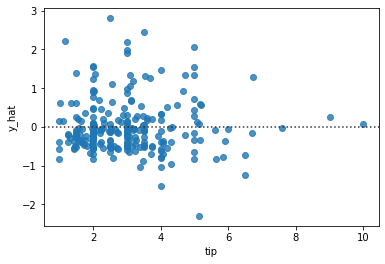

In [5]:
sns.residplot('tip', 'y_hat', data=df)

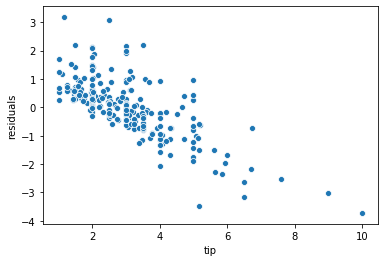

In [6]:
sns.scatterplot(df.tip, df.residuals)

## Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [7]:
df['resid^2'] = df.residuals ** 2
df['resid_bl^2'] = df.resid_bl ** 2
df.head()

,total_bill,tip,sex,smoker,day,time,size,y_bl,y_hat,residuals,resid_bl,resid^2,resid_bl^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279,2.871792,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279,0.119870,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721,0.139252,0.251724
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,-0.311721,0.009458,0.097170
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,-0.611721,0.011487,0.374203


In [8]:
# sum of squared errors
SSE = mean_squared_error(df.tip, df.y_hat)*len(df.tip)

In [9]:
# explained sum of squares
ESS = sum((df.y_hat - df.tip.mean()) ** 2)

In [10]:
# total sum of squares
TSS = ESS + SSE

In [11]:
# mean squared error
MSE = mean_squared_error(df.tip, df.y_hat)

In [12]:
# root mean squared error
RMSE = sqrt(MSE)

## Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [13]:
# sum of squared errors
SSE_bl = mean_squared_error(df.tip, df.y_bl)*len(df)

In [14]:
# mean squared error
MSE_bl = mean_squared_error(df.tip, df.y_bl)

In [15]:
# root mean squared error
RMSE_bl = sqrt(MSE_bl)

## Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [16]:
df_eval = pd.DataFrame(np.array(['SSE', 'MSE', 'RMSE']), columns=['metric'])

df_eval = pd.DataFrame({
    'metric': ['SSE', 'MSE', 'RMSE'],
    'model_error': [SSE, MSE, RMSE],
    'bl_model_error': [SSE_bl, MSE_bl, RMSE_bl],
    'error_delta': [(SSE - SSE_bl), (MSE - MSE_bl), (RMSE - RMSE_bl)]    
                       })

df_eval

,metric,model_error,bl_model_error,error_delta
0,SSE,252.788744,465.212477,-212.423733
1,MSE,1.036019,1.906609,-0.870589
2,RMSE,1.017850,1.380800,-0.362950


In [17]:
if SSE < SSE_bl:
    print(True)
else:
    print(False)

True


## What is the amount of variance explained in your model?

In [18]:
r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.457


## Is your model significantly better than the baseline model?

In [19]:
f_pval = model.f_pvalue
print("p-value for model significance = ", round(f_pval,4))

p-value for model significance =  0.0


## Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
 - sum of squared errors (SSE)
 - explained sum of squares (ESS)
 - total sum of squares (TSS)
 - mean squared error (MSE)
 - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
- model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

In [20]:
def plot_residuals(y, yhat):
    resids = yhat - y
    sns.scatterplot(y, resids)

In [21]:
def regression_errors(y, yhat):
    """
    Takes in two columns: y is the variable being predicted, yhat is the predictions
    Returns 5 values: sum of squared errors (SSE), explained sum of squares (ESS),
    total sum of squares (TSS), mean squared error (MSE), root mean squared error (RMSE)
    """
    SSE = mean_squared_error(y, yhat)*len(y)
    ESS = sum((yhat - y.mean()) ** 2)
    TSS = ESS + SSE
    MSE = mean_squared_error(y, yhat)
    RMSE = sqrt(MSE)
    return SSE, ESS, TSS, MSE, RMSE

In [22]:
def baseline_mean_errors(y):
    """
    Takes in one column: the variable being predicted, and the dataframe containing the column
    Returns 3 baseline values: sum of squared errors (SSE), mean squared error (MSE),
    root mean squared error (RMSE)
    """
    ydf = pd.DataFrame(y)
    ydf['yhat_bl'] = y.mean()
    SSE_bl = mean_squared_error(y, ydf.yhat_bl)*len(y)
    MSE_bl = mean_squared_error(y, ydf.yhat_bl)
    RMSE_bl = sqrt(MSE_bl)
    return SSE_bl, MSE_bl, RMSE_bl

In [23]:
def better_than_baseline(y, yhat):
    """
    Takes in two columns and their dataframe: y is the variable being predicted, yhat is the predictions
    Returns True if the model performs better than the baseline model (baseline model is the mean of y)
    Returns False if not
    """
    ydf = pd.DataFrame(y, yhat)
    ydf['yhat_bl'] = y.mean()
    SSE = mean_squared_error(y, yhat)*len(y)
    SSE_bl = mean_squared_error(y, ydf.yhat_bl)*len(y)
    if SSE < SSE_bl:
        return True
    else:
        return False

In [34]:
def model_significance(ols_model):
    """
    Takes in the ols_model created by statsmodels.formula.api
    Returns R^2 and p-value
    """
    r2 = ols_model.rsquared
    f_pval = ols_model.f_pvalue
    return "p-value:", round(f_pval,4), 'R-squared:', round(r2,3)

## Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [25]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [26]:
ols_model = ols('mpg.hwy ~ mpg.displ', data=mpg).fit()
mpg['yhat'] = ols_model.predict(mpg.displ)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.342591
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,29.342591
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,28.636473
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,28.636473
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,25.812002


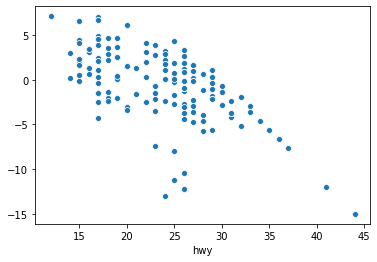

In [27]:
plot_residuals(mpg.hwy, mpg.yhat)

In [28]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(mpg.hwy, mpg.yhat)
SSE, ESS, TSS, MSE, RMSE

(3413.829008995466,
 4847.833384166932,
 8261.662393162398,
 14.589012858954984,
 3.819556631201452)

In [29]:
SSE_bl, MSE_bl, RMSE_bl = baseline_mean_errors(mpg.hwy)
SSE_bl, MSE_bl, RMSE_bl

(8261.66239316239, 35.30624954342902, 5.941906221359356)

In [32]:
better_than_baseline(mpg.hwy, mpg.yhat)

True

In [35]:
model_significance(ols_model)

('p-value:', 0.0, 'R-squared:', 0.587)